<a href="https://colab.research.google.com/github/coldjoke123/python1/blob/master/Q8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 設計有分支的模型來鑑別手寫數字資料

In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import concatenate, add
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input

Using TensorFlow backend.


# 讀取Mnist資料，並且標準化

In [3]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train0.reshape((60000,28*28))
x_test = x_test0.reshape((10000,28*28))
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_test -= x_test.min()
x_test = x_test/x_test.max()

In [0]:
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

# 建構一個有分支的Model 神經元個數使用上次的參數測試


In [0]:
x = Input(shape=(784,))

In [0]:
f_1 = Dense(650,activation='relu') #784 -> 650
f_11 = Dense(350,activation='sigmoid') #650 -> 350
f_12 = Dense(350,activation='relu') #650 -> 350
f_2 = Dense(10,activation='softmax') #350+350 -> 10

In [8]:
h_1 = f_1(x)
h_11 = f_11(h_1)
h_12 = f_12(h_1)
u = concatenate([h_11,h_12])
y = f_2(u)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 650)          510250      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 350)          227850      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 350)          227850      dense_1[0][0]                    
__________________________________________________________________________________________________
concatenat

# 下圖為此模型的圖像

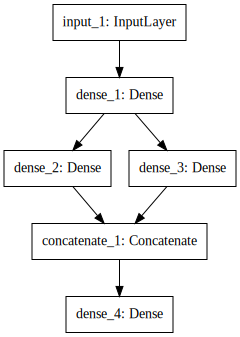

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Loss function 選 binary cross entropy 且optimizer 選 SGD

In [0]:
model.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [13]:
model_1 = model.fit(x_train, y_train, batch_size=100, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.2007 - acc: 0.9252
Epoch 2/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.0841 - acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.0636 - acc: 0.9793
Epoch 4/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0558 - acc: 0.9817
Epoch 5/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0514 - acc: 0.9832
Epoch 6/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0482 - acc: 0.9841
Epoch 7/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0456 - acc: 0.9851
Epoch 8/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0434 - acc: 0.9858
Epoch 9/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0415 - acc: 0.9865
Epoch 10/20
60000/60000 [=========

In [14]:
score = model.evaluate(x_test,y_test)
print('loss:', score[0])
print('正確率:', score[1])

10000/10000 [==============================] - 1s 107us/step
loss: 0.02738337711514905
正確率: 0.9911499994277954


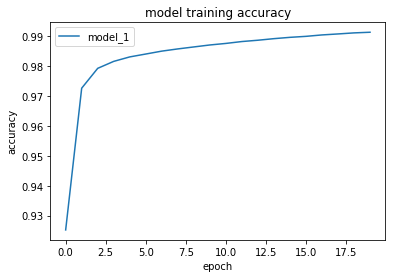

In [15]:
plt.plot(model_1.history["acc"])
         
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['model_1'], loc = 'best')
plt.show()

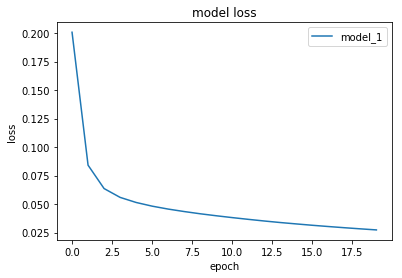

In [19]:
plt.plot(model_1.history['loss'])
         
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['model_1'], loc = 'best')
plt.show()

# 由以上可以看出此分支的模型準確率高達了 $99.115\%$!